Text(0.5, 1.0, 'Detected Features in Right Image')

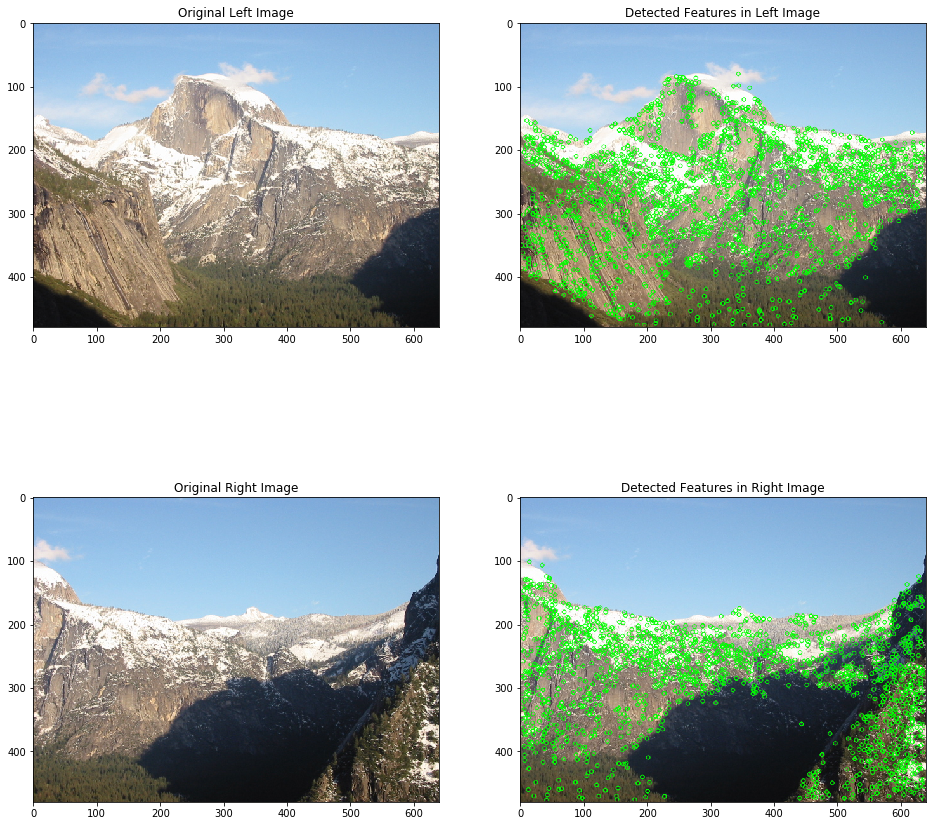

In [2]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im_left = cv.imread('../170213V_assignment2/sift_panorama/yosemite2.jpg',cv.IMREAD_ANYCOLOR)
im_right = cv.imread('../170213V_assignment2/sift_panorama/yosemite3.jpg',cv.IMREAD_ANYCOLOR)

sift = cv.xfeatures2d.SIFT_create()
# find the key points and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(im_left,None)
kp2, des2 = sift.detectAndCompute(im_right,None)

with_kp_il = cv.drawKeypoints(im_left,kp1,None,color = (0,255,0))
with_kp_ir = cv.drawKeypoints(im_right,kp2,None,color = (0,255,0))

#plot the image
fig = plt.figure(figsize = (16,16))
plt.subplot(2,2,1)
plt.imshow(cv.cvtColor(im_left, cv.COLOR_BGR2RGB))
plt.title('Original Left Image')
plt.subplot(2,2,2)
plt.imshow(cv.cvtColor(with_kp_il, cv.COLOR_BGR2RGB))
plt.title('Detected Features in Left Image')
plt.subplot(2,2,3)
plt.imshow(cv.cvtColor(im_right, cv.COLOR_BGR2RGB))
plt.title('Original Right Image')
plt.subplot(2,2,4)
plt.imshow(cv.cvtColor(with_kp_ir, cv.COLOR_BGR2RGB))
plt.title('Detected Features in Right Image')
#cv.imshow('original_image_left_keypoints',cv.drawKeypoints(im_left,kp1,None))
fig.savefig('../170213V_assignment2/sift_panorama/feature_detection.jpg')

In [3]:
# FLANN feature matching
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
match = cv.FlannBasedMatcher(index_params, search_params)
matches = match.knnMatch(des1,des2,k=2)

In [4]:
# lowe's ratio test
best_matches = []
for m,n in matches:
    if m.distance < 0.3*n.distance:
        best_matches.append(m)

Text(0.5, 1.0, 'Matched Features in the Two Images')

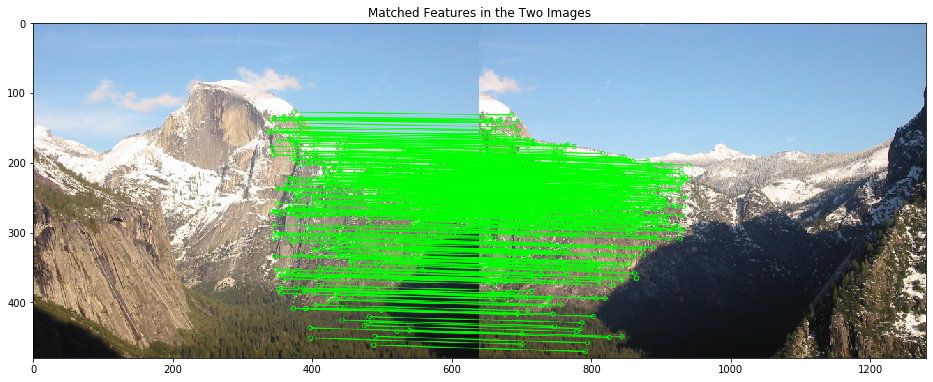

In [5]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   flags = 2)
fig = plt.figure(figsize = (16,16))
image = cv.drawMatches(im_left,kp1,im_right,kp2,best_matches,None,**draw_params)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Matched Features in the Two Images')
fig.savefig('../170213V_assignment2/sift_panorama/matched_features.jpg')

In [6]:
# finding homography
if len(best_matches) > 4:
    # get (x,y) coordinates of the respective matched points
    p1 = np.float32([ kp1[m.queryIdx].pt for m in best_matches ]).reshape(-1,1,2)
    p2 = np.float32([ kp2[m.trainIdx].pt for m in best_matches ]).reshape(-1,1,2)
H, status = cv.findHomography(p2, p1, cv.RANSAC, 5.0) # computing H to transform right_image to left_image

In [ ]:
panorama = cv.warpPerspective(im_right, H, (1000,800)) # Applies a homogeneous transformation to an image.
panorama[0:im_left.shape[0], 0:im_left.shape[1]] = im_left

cv.imwrite('../170213V_assignment2/sift_panorama/panorama.jpg',panorama[0:im_left.shape[0],0:1000])

cv.namedWindow("Panorama", cv.WINDOW_AUTOSIZE)
cv.imshow("Panorama", panorama)
cv.waitKey(0)
cv.destroyAllWindows()